# Step 4 - Model Prediction App

In [43]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

In [44]:
df = pd.read_csv("Resources/clean_model_data.csv",header=0)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape #31 because pt id was dropped for the dataset loaded

(569, 31)

In [74]:
#df.info()

In [75]:
#df.isnull().sum()

In [47]:
df.diagnosis.unique() #The dataset loaded already converted M to 1 and B to 0

array([1, 0])

In [49]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# Step 1: Separate out M and B data for graph comparison
malignant = df[df['diagnosis'] ==1]
benign = df[df['diagnosis'] ==0]

In [8]:
#Select column names based on our previous correlation analysis of which features were highly correlated with Dx
list = ['radius_mean']+ ['perimeter_mean']+['area_mean']+['concavity_mean']+['concave_points_mean'] + ['radius_worst'] + ['perimeter_worst'] +['area_worst']+ ['concavity_worst']+ ['concave_points_worst']
correlation_data = df.loc[:,list]
correlation_data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave_points_worst
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [9]:
correlation_data['diagnosis'] = df['diagnosis']
correlation_data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave_points_worst,diagnosis
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654,1
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860,1
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430,1
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575,1
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625,1


In [10]:
correlation_data.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave_points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave_points_worst', 'diagnosis'],
      dtype='object')

In [11]:
df_feature_only = df.drop("diagnosis", axis=1)
df_list=df_feature_only.columns

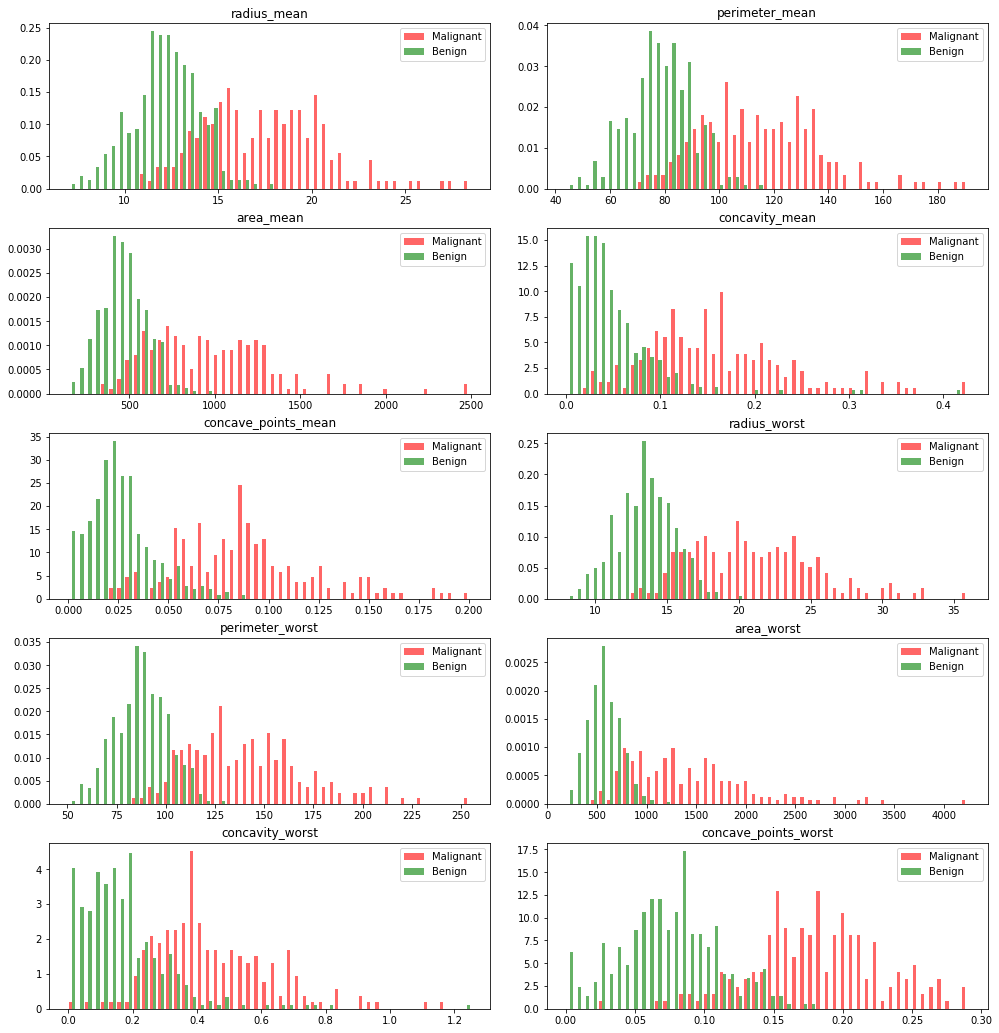

In [12]:
#Plots of 10 features with the highest correlations based on previous analysis
plt.rcParams.update({'font.size': 10})
plot, graphs = plt.subplots(nrows=5, ncols=2, figsize=(14,16))
graphs = graphs.flatten()

for idx, graph in enumerate(graphs):
    graph.figure
    
    binwidth= (max(df[list[idx]]) - min(df[list[idx]]))/50
    bins = np.arange(min(df[list[idx]]), max(df[list[idx]]) + binwidth, binwidth)
    graph.hist([malignant[list[idx]],benign[list[idx]]], bins=bins, alpha=0.6, density=True, label=['Malignant','Benign'], color=['red','green'])
    graph.legend(loc='upper right')
    graph.set_title(list[idx])
plt.tight_layout()
plt.subplots_adjust(top=0.88)

### Build a forest to compute the feature importances


In [13]:
# Assign X (data) and y (target)
### BEGIN SOLUTION
X = df.drop("diagnosis", axis=1)
feature_cols = X.columns
y = df["diagnosis"]

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [14]:
X.shape[1]

30

1. feature 27 (0.131298)
2. feature 20 (0.093268)
3. feature 23 (0.074810)
4. feature 7 (0.072522)
5. feature 22 (0.071736)
6. feature 6 (0.066074)
7. feature 2 (0.059481)
8. feature 3 (0.050358)
9. feature 26 (0.050312)
10. feature 0 (0.046137)
11. feature 25 (0.030475)
12. feature 13 (0.026868)
13. feature 5 (0.026427)
14. feature 12 (0.024186)
15. feature 21 (0.021797)
16. feature 1 (0.021776)
17. feature 24 (0.017255)
18. feature 28 (0.016239)
19. feature 10 (0.015806)
20. feature 4 (0.011034)
21. feature 17 (0.009510)
22. feature 8 (0.008765)
23. feature 29 (0.008740)
24. feature 15 (0.008092)
25. feature 16 (0.007731)
26. feature 9 (0.006273)
27. feature 11 (0.006120)
28. feature 19 (0.005950)
29. feature 18 (0.005501)
30. feature 14 (0.005456)


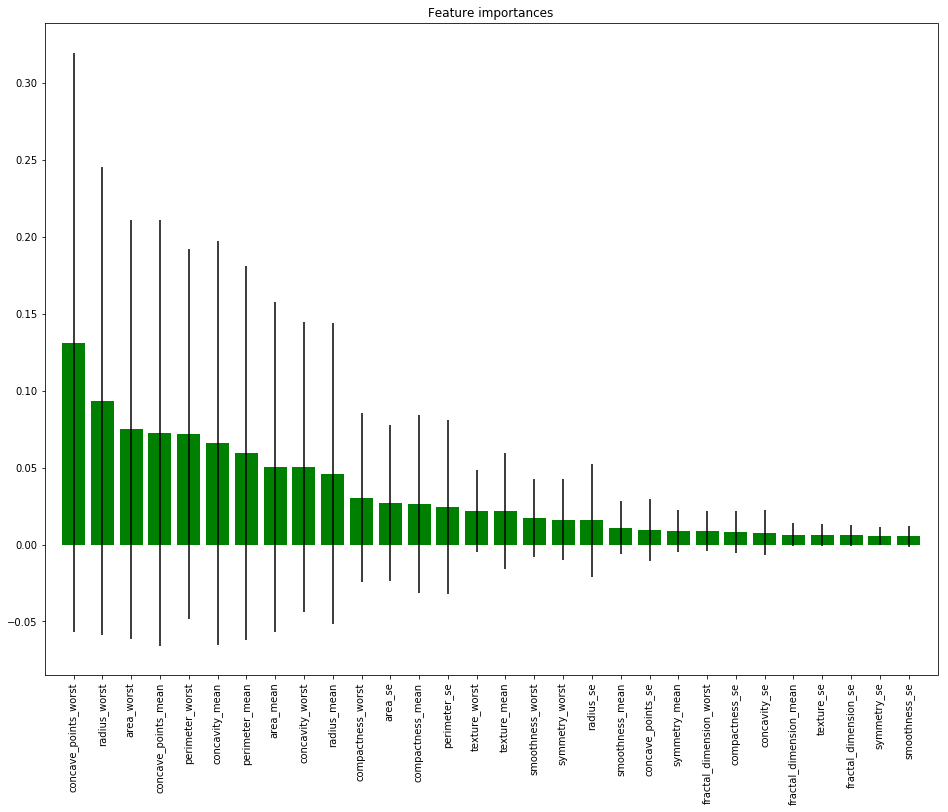

In [15]:
# Build a forest and compute the feature importances
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train,y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))    
    
# Plot the feature importances of the forest
plt.figure(figsize=(16,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

- Based on the plot above we can conclude that mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of cancer. The larger these parameters are the more the tendency that they are correlated with malignant tumors. The remainder of the features do not show an affitity for one diagnosis over the other which is why they are not good predictors of the type of cancer. 

# Model Classification

### SVM (Support Vector Machine)
#### 10 selected features¶

In [16]:
# Assign X (data) and y (target)
### BEGIN SOLUTION
data= correlation_data.drop("diagnosis", axis=1)

print(data.shape)
### END SOLUTION

(569, 10)


In [17]:
target =correlation_data["diagnosis"]
target_names = ["Benign", "Malignant"]

In [18]:
feature_names = data.columns
data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave_points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave_points_worst
0,17.99,122.80,1001.0,0.3001,0.14710,25.38,184.60,2019.0,0.7119,0.2654
1,20.57,132.90,1326.0,0.0869,0.07017,24.99,158.80,1956.0,0.2416,0.1860
2,19.69,130.00,1203.0,0.1974,0.12790,23.57,152.50,1709.0,0.4504,0.2430
3,11.42,77.58,386.1,0.2414,0.10520,14.91,98.87,567.7,0.6869,0.2575
4,20.29,135.10,1297.0,0.1980,0.10430,22.54,152.20,1575.0,0.4000,0.1625


In [19]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [20]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test, y_test))

Test Acc: 0.986


## Save the ML Model 
-  Model saved to pickle file to be used for predictions. Find easy to use documentation: https://www.geeksforgeeks.org/saving-a-machine-learning-model/


In [77]:
#Save model to pickle file
from sklearn.externals import joblib
joblib.dump(model, 'Resources/predict_cancer.pkl')

['Resources/predict_cancer.pkl']

In [27]:
# Calculate classification report
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,  y_pred,
                            target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        89
   Malignant       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



In [76]:
def classifaction_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-5]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('Resources/classification_report.csv', index = False)

report = classification_report(y_test, y_pred,)
classifaction_report_csv(report)

In [62]:
#df.dtypes
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [67]:
# Test model with new feature data to see results
features = [[
 15, #radius_mean
 80, # perimeter_mean
 400, #area_mean 
 0.3, #concavity_mean
 0.08, #concave points_mean
 15, #radius_worst
 150, # perimeter_worst
 500, #area_worst  
 0.5, #concavity_worst
 0.50, # concave points_worst                                      
]]

In [68]:
# Predict B or M given new features
diagnosis = model.predict(features)

In [69]:
diagnosis

array([0])

In [70]:
#Conditional to print results 
if diagnosis==0:
   cancer = 'Benign'
elif diagnosis==1:
   cancer = 'Malignant'
print("The breast cancer of this patient should be: %s" % (cancer,) )

The breast cancer of this patient should be: Benign


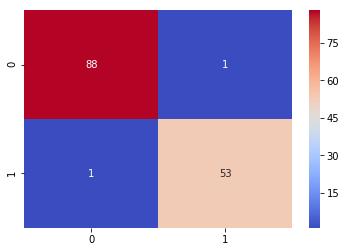

In [73]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns_plot=sns.heatmap(cm,annot=True,fmt="d", cmap = 'coolwarm')